# Analysis of Treatment Outcomes: Failure Event Proportions in AIDs Clinical Trials

This notebook analyzes data from clinical trials investigating the effectiveness of monotherapy and combination treatments in minimizing the progression of human immunodeficiency virus (HIV). By examining failure event proportions across therapy types, I aim to determine whether there are significant differences in treatment outcomes. 

Statistical testing, specifically a Chi-Square test, is performed to evaluate the relationship between therapy types and failure events. Visualization is used to provide a representation of the results.

## Hypotheses:

- **Null Hypothesis (H₀):** the proportion of failure events is the same between montherapy and combination therapies. 

- **Alternative Hypothesis (Hᴀ):** there is a significant difference in the proportion of failure events between montherapy and combination therapies.

----

## Data Loading

The preprocessed data is loaded and necessary packages are imported. The data is inspected to understand its structure. 

In [493]:
# Import packages
from helpers import printmd # to format output in Markdown
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/processed/aids_clinical_trials_cleaned.csv'
aids_trials = pd.read_csv(file_path)
display(aids_trials.head())

,age,weight_kg,gender,baseline_cd4_count,treatment_type,time_to_event,event_status
0,48.0,89.8128,Female,422.0,ZDV+ddC,948,0
1,56.5,49.4424,Female,162.0,ddI,1002,1
2,45.0,88.4520,Male,326.0,ddI,961,0
3,47.0,85.2768,Male,287.0,ddI,1166,0
4,43.0,66.6792,Male,504.0,ZDV,1090,0


-----

## Proportion of Failure Events by Treatment

The proportion of failure events for each treatment is calculated to identify which treatment had the lowest proportion of failures.

In [495]:
# Calculate failure event proportions by treatment groups
treatment_failure_prop = aids_trials.groupby('treatment_type')['event_status'].mean().reset_index()
treatment_failure_prop.rename(columns={'event_status':'failure_prop'}, inplace=True)
printmd('**Proportion of Failure Events by Treatment:**\n')
display(treatment_failure_prop)

# Identify the treatment group with the lowest proportion of failures
lowest_failure_treatment = treatment_failure_prop.loc[treatment_failure_prop['failure_prop'].idxmin()]
printmd('**Treatment with Lowest Proportion of Failure Events:**')
display(lowest_failure_treatment)

**Proportion of Failure Events by Treatment:**


,treatment_type,failure_prop
0,ZDV,0.340226
1,ZDV+ddC,0.208015
2,ZDV+ddI,0.197318
3,ddI,0.228164


**Treatment with Lowest Proportion of Failure Events:**

treatment_type     ZDV+ddI
failure_prop      0.197318
Name: 2, dtype: object

----

## Proportion of Failure Events by Therapy Type

The proportion of failure events for monotherapy and combination therapy is calculated to identify which type of therapy had the lowest proportion of failures.

In [497]:
#  Categorize therapies as combination or monotherapy
aids_trials['therapy_type'] = aids_trials['treatment_type'].apply(lambda x: 'Combination' if '+' in x else 'Monotherapy')

# Calculate failure event proportions by therapy type
therapy_failure_prop = aids_trials.groupby('therapy_type')['event_status'].mean().reset_index()
therapy_failure_prop.rename(columns={'event_status':'failure_prop'}, inplace=True)
printmd('**Proportion of Failure Events by Therapy Type:**\n')
display(therapy_failure_prop)

# Identify the type of therapy with the lowest proportion of failures
lowest_failure_type = therapy_failure_prop.loc[therapy_failure_prop['failure_prop'].idxmin()]
printmd('**Treatment with Lowest Proportion of Failure Types:**')
display(lowest_failure_type)

**Proportion of Failure Events by Therapy Type:**


,therapy_type,failure_prop
0,Combination,0.202677
1,Monotherapy,0.282708


**Treatment with Lowest Proportion of Failure Types:**

therapy_type    Combination
failure_prop       0.202677
Name: 0, dtype: object

## Chi-Square Test of Independence

A Chi-Square test is performed to examine if there is a significant difference in the proportion of failure events between therapy types.

In [499]:
# Perform Chi-Square test
crosstab = pd.crosstab(aids_trials['therapy_type'], aids_trials['event_status'])
chi2, p, dof, expected = chi2_contingency(crosstab)
printmd('**Chi-Square Statistic:**')
print(f'{chi2:.2f}')
printmd('**P-Value:**')
print(f'{p:.5f}')


# Interpret Chi-Square test results
alpha = 0.05
if p < alpha:
    print('\nThe difference in the proportion of failure events between monotherapy and combination therapies is statistically significant.')
else:
    print('\nThere is no significant difference in the proportion of failure events between monotherapy and combination therapies.')


**Chi-Square Statistic:**

18.15


**P-Value:**

0.00002

The difference in the proportion of failure events between monotherapy and combination therapies is statistically significant.


----

## Visualization: Failure Proportions by Therapy Type

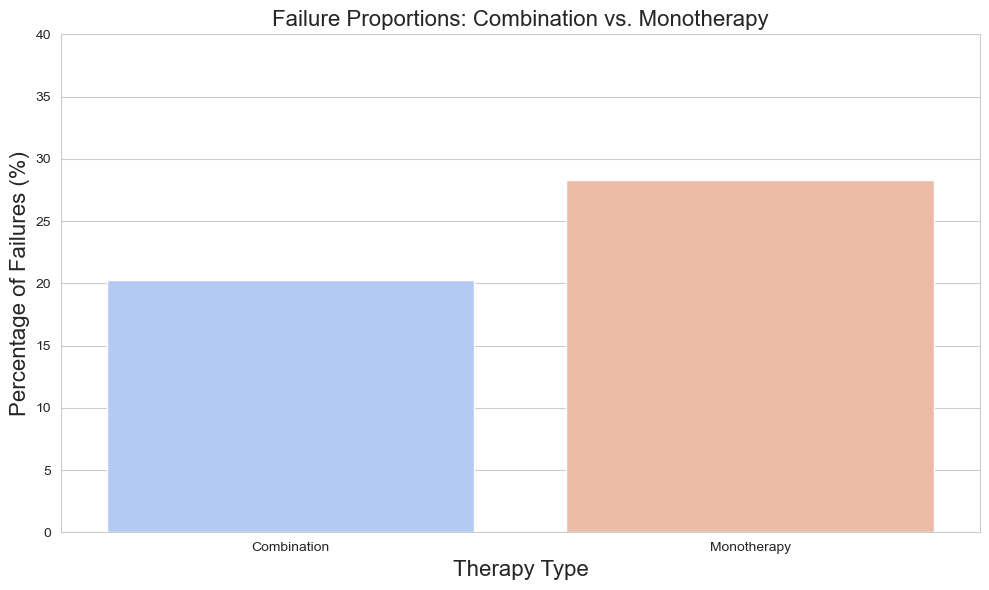

In [501]:
# Convert failure event proportions to percentages
therapy_failure_prop['failure_prop'] = therapy_failure_prop['failure_prop'] * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.barplot(
    data=therapy_failure_prop,
    x='therapy_type',
    y='failure_prop',
    hue='therapy_type',
    palette='coolwarm',
)


plt.ylim(0, 40)
plt.title('Failure Proportions: Combination vs. Monotherapy', fontsize=16)
plt.xlabel('Therapy Type', fontsize=14)
plt.ylabel('Percentage of Failures (%)', fontsize=14)
plt.tight_layout()
plt.show()

# Results and Discussion

**Proportion of Failure Events by Treatment Group and Treatment Type**
- The proportion of failure events for each treatment group are:
  * **ZDV:** 34.02%
  * **ddI:** 22.82%
  * **ZDV + ddC:** 20.80%
  * **ZDV + ddI:** 19.73% (lowest failure proportion)


- Combination therapies exhibit a lower proportion of failures (**20.27%**) when compared to monotherapy (**28.27%**)

**Chi-Square Test Results**
- **Chi-Square Statistic:** 18.15
- **P-Value:** 0.00002
  
- **Interpretation:** Since the p-value < 0.05, the difference in the proportion of failure events between monotherapy and combination therapies is statistically significant. We reject the null hypothesis that failure event proportions are independent of therapy type.